###### Mélodie ROSSI, L2 SPRINT-B


# Mini-Projet 1 : Mouvement rétrograde de Mars


## Présentation du sujet

Nous cherchons à créer un modèle qui représente le mouvement rétrogarde de Mars. Pour cela nous avons des données dans un document en format CSV que nous allons comparer au modèle que nous construirons.

---

## Mouvement circulaire uniforme

Les équations du mouvement pour un mouvement circulaire uniforme des astres par rapport $\textbf{au Soleil}$ :

Terre :

\begin{cases}
X(t) = R_T cos(\omega_T t+ \phi) \\
Y(t) = R_T sin(\omega_T t+ \phi)
\end{cases}



Mars :
\begin{cases}
X(t) = R_M cos(\omega_M t+ \phi) \\
Y(t) = R_M sin(\omega_M t+ \phi)
\end{cases}


avec $\omega=\frac{2\pi}{T}$ :      
$\omega_T=\frac{2\pi}{T_T}$           
$\omega_M=\frac{2\pi}{T_M}$

Si $t=0$, on a :      
$X(t=0)=Rcos(0 \times \omega+\phi)=Rcos(\phi)$,            
$Y(t=0)=Rsin(0 \times \omega+\phi)=Rsin(\phi)$.          

---

## Modèle bidimensionnel

### Grandeurs utiles :

Rayon de l'orbite de la Terre : 1 UA  
Période de révolution de la Terre : 365.256 jours  
Rayon de l'orbite de Mars : 1.52371 UA  
Période de révolution de Mars : 686.885 jours

![solar.png](solar.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as m

#Paramètres
R_T = 1 #UA
T_T = 365.256 #jours
R_M = 1.52371 #UA
T_M = 686.885 #jours

avec les périodes respectives $T_T$ et $T_M$, nous pouvons calculer $\omega_T$ et $\omega_M$ :     

In [3]:
omega_T = 2*np.pi/T_T #en jours^-1
omega_M = 2*np.pi/T_M #en jours^-1

print(omega_T, omega_M) 

0.01720214125758259 0.009147361359149765


On cherche l'angle $\phi_{app}(t)$.

Nous cherchons les données par rapport à la Terre, or nous les avons seulement par rapport au Soleil :

\begin{cases}
X(t) = R_{M/T} cos(\omega_{M/T} t+ \phi) \\
Y(t) = R_{M/T} sin(\omega_{M/T} t+ \phi)
\end{cases}


Rappelons que $\phi_{app}(t) \ne \phi$

On fait ensuite le rapport des deux coordonnées :
$$\frac{Y_{M/T}}{X_{M/T}} = tan(\omega_{M/T}+\phi_{app})$$
or $\omega_{M/T}t=\phi_{M/T}$        
et $\phi_{app}(t)=\phi_{M/T} + \phi_{app}$

$$\phi_{app}(t) = arctan(\frac{Y_{M/T}}{X_{M/T}})$$
or nous ne connaissons pas $Y_{M/T}$ et $X_{M/T}$

Nous utilisons donc la Transformée de Galilée :
$$X_{M/T}=X_{M}+X_{Soleil/T}$$ 
or on a :
$$X_{M/T}=X_{M}-X_{T}$$ 

d'où :
\begin{cases}
X_{M/T}(t) = X_{M}-X_{T} \\
Y_{M/T}(t) = Y_{M}-Y_{T}
\end{cases}

On finalement : 
$$\phi_{app}(t) = arctan(\frac{Y_{M}-Y_{T}}{X_{M}-X_{T}})$$

$$\phi_{app}(t) = arctan(\frac{R_M sin(\omega_M t+ \phi)-R_T sin(\omega_T t+ \phi)}{ R_M cos(\omega_M t+ \phi)-R_T cos(\omega_T t+ \phi)})$$

In [4]:
def phi_app(t1):
    t = (t1 - start_np).astype('timedelta64[D]').astype(float) #days_elasped
    b = R_M*np.sin(omega_M*t+phi)-R_T*np.sin(omega_T*t+phi)
    a = R_M*np.cos(omega_M*t+phi)-R_T*np.cos(omega_T*t+phi)
    return np.degrees(np.arctan2(b, a))+180

---

## Données

Le fichier DataMars.csv contient les coordonnées (longitude et latitude) de la position de Mars par rapport au centre de la Terre en fonction de la date entre 2015 et 2017. Notons que la latitude est définie ici par rapport au plan de l'écliptique.    
Le centre de la boucle peut s'observer à la date du 25 mai 2016, à la longitude de 240.5°.

In [5]:
df_DataMars=pd.read_csv("DataMars.csv", comment="#", delimiter=",")

df_DataMars

,Target,Date,Longitude (d:m:s),Longitude (decimal),Latitude (d:m:s),Latitude (decimal)
0,Mars,2015-03-01,6 41 13.6229,6.687117,-00 29 17.9130,-0.488309
1,Mars,2015-03-02,7 27 2.2465,7.450624,-00 28 35.5370,-0.476538
2,Mars,2015-03-03,8 12 48.4061,8.213446,-00 27 53.1443,-0.464762
3,Mars,2015-03-04,8 58 32.0880,8.975580,-00 27 10.7400,-0.452983
4,Mars,2015-03-05,9 44 13.2819,9.737023,-00 26 28.3298,-0.441203
...,...,...,...,...,...,...
895,Mars,2017-08-12,134 12 33.4912,134.209303,+01 8 6.1441,1.135040
896,Mars,2017-08-13,134 50 55.6253,134.848785,+01 8 12.7600,1.136878
897,Mars,2017-08-14,135 29 17.1024,135.488084,+01 8 19.2188,1.138672
898,Mars,2017-08-15,136 7 37.9459,136.127207,+01 8 25.5227,1.140423


---

## Représentation graphique

### Tracer les données

Nous avons besoin de vérifier la taille des abscisses et des ordonnées.        

In [6]:
type(df_DataMars["Date"])
df_DataMars["Date"].shape[0]

900

In [7]:
type(df_DataMars["Longitude (decimal)"])
df_DataMars["Longitude (decimal)"].shape[0]

900

In [8]:
dfd1=pd.to_datetime(df_DataMars["Date"])

Nous avons besoin de convertir en np.array pour pouvoir tracer le graph :

In [9]:
dflongitude=np.array(df_DataMars["Longitude (decimal)"])
dfdate=np.array(dfd1)

In [10]:
print(type(dfdate[0]), dfdate.shape)

<class 'numpy.datetime64'> (900,)


In [11]:
type(dflongitude)
dflongitude.shape

(900,)

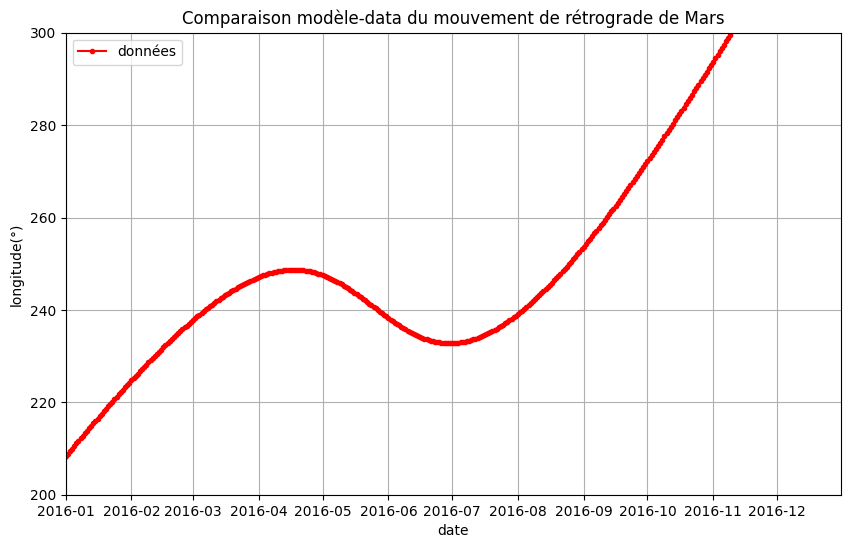

In [12]:
from datetime import datetime

plt.figure(figsize=(10, 6))
plt.plot(dfdate, dflongitude, 'r', label="données", marker=".")

plt.xlim(datetime(2016, 1, 1),datetime(2016, 12, 31))
plt.ylim(200, 300)

plt.xlabel("date")
plt.ylabel("longitude(°)")
plt.title("Comparaison modèle-data du mouvement de rétrograde de Mars")
plt.grid()
plt.legend()
plt.show()

### Tracer le modèle et les données

In [13]:
start_date=datetime(2014, 4, 5) #changement pour avoir une date d'initialisation au 25 mai 2016
end_date=datetime(2017, 12, 31)

#pour les limites du graphique
start_gen=datetime(2016, 1, 1)
end_gen=datetime(2016, 12, 31)

#transformation en type datetime64 pour pouvoir tracer
start_np=np.datetime64(start_date)
end_np=np.datetime64(end_date)

In [14]:
c=np.datetime64(datetime(2014,4,5))
e=c-np.datetime64(datetime(2015,3,1))
print(np.array([e])/ 86400000000, "jours") # conversion ms à jours

[-330] jours


Pour aligner $t=0$ (l'origine des dates) avec la date 2016-05-25, on a décalé le début des dates à -330 jours, c'est-à-dire que nous avons mis en place un décalage de 330 jours avec l'origine initiale des dates (2015-03-01).

In [15]:
# phi_app utilise une date au lieu d'un tableau np.linspace
step = np.timedelta64(1, 'D')
dates = np.arange(start_np, end_np, step)

Le centre de la boucle peut s'observer à la date du 25 mai 2016, à la longitude de 240.5°. Donc $\phi=0$ à la date du 25 mai 2016 et $\phi_{app}(2016/05/25)= 240.5°$

On cherche $\phi$ avec les conditions initiales citées au-dessus.

$$\phi = \frac{240.5 \pi}{180} + n\pi$$

In [16]:
phi=np.degrees(240.5*np.pi/180+2*np.pi)

In [17]:
print(phi, "degrés")

600.5 degrés


In [18]:
d=np.datetime64(datetime(2016,5,25))-start_np
print(np.array([d])/ 86400000000, "jours") # conversion ms à jours

[781] jours


$\phi=0$ au 451ème jour

In [19]:
phi_app(dates[451])+180 #on ajoute 180° pour que les données et le modèle soient dans le même intervalle

453.57933015165185

---

$$\phi_{\text{app}}(0) = \arctan\left(\tan(\phi)\right) = \phi$$

In [20]:
phi_app(dates[0])

26.115597605933687

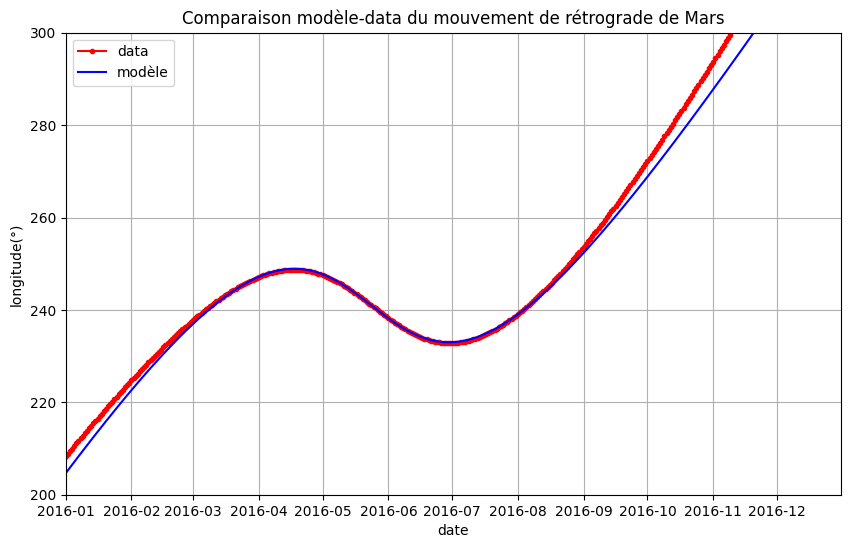

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(dfdate, dflongitude, 'r', label="data", marker=".")
plt.plot(dates, phi_app(dates)+166, 'b', label='modèle') #changement, ajout de 166° à phi_app du modèle afin que les deux soient dans la plage 0 à 360°

plt.xlim(start_gen, end_gen)
plt.ylim(200, 300)

plt.xlabel("date")
plt.ylabel("longitude(°)")
plt.title("Comparaison modèle-data du mouvement de rétrograde de Mars")
plt.grid()
plt.legend()
plt.show()